# Reinforcement Learning: Theory and Study


The purpose of this notebook is to investigate Decision Theory and build a decision processes under uncertainty. 
We will first build a Markov Decision Process to them dive into a decision process with no uncertainty and solving it with a Value Iteration algorithmn, to  grasp the challenges of creating a decision policy.
We will then look into Reinforcement learning to build a decision process under uncertainty, implementing a Q-learning algorithmn. 

*This notebook is inspired from an assignment of the course **DAT405 Introduction to Data Science and AI, 2021**, taken when I was studying at Chalmers University of Technology*.

*See the references at the end of this notebook.*


## Part 1: Markov Decision Process theory


Markov Decision Process (MDP) provides a mathematical framework for modeling sequential decision making under uncertainty. A MDP consists of five parts: the specific decision times, the state space of the environment/system, the available actions for the decision maker, the rewards, and the transition probabilities between the states.

* Decision epochs: $t={1,2,...,T}$, where $T\leq \infty$
* State space: $S=\{s_1,s_2,...,s_N\}$ of the underlying environment
* Action space $A=\{a_1,a_2,...,a_K\}$ available to the decision maker at each decision epoch
* Reward functions $R_t = r(a_t,s_t,s_{t+1})$ for the current state and action, and the resulting next state
* Transition probabilities $p(s'|s,a)$ that taking action $a$ in state $s$ will lead to state $s'$

At a given decision epoch $t$ and system state $s_t$, the decions maker, or *agent*, chooses an action $a_t$, the system jumps to a new state $s_{t+1}$ according to the transition probability $p(s_{t+1}|s_t,a_t)$, and the agent receives a reward $r_t(s_t,a_t,s_{t+1})$. This process is then repeated for a finite or infinite number of times.

A *decision policy* is a function $\pi: s \rightarrow a$, that gives instructions on what action to choose in each state. A policy can either be *deterministic*, meaning that the action is given for each state, or *randomized* meaning that there is a probability distribution over the set of possible actions. Given a specific policy $\pi$ we can then compute the the *expected total reward* when starting in a given state $s_1 \in S$, which is also known as the *value* for that state, 

$$V^\pi (s_1) = E\left[ \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) {\Large |} s_1\right] = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) p(s_{t+1} | a_t,s_t)$$ 

where $a_t = \pi(s_t)$. To ensure convergence and to control how much credit to give to future rewards, it is common to introduce a *discount factor* $\gamma \in [0,1]$. For instance, if you think all future rewards should count equally, you would use $\gamma = 1$, while if you only care less about future rewards you would use $\gamma < 1$. The expected total *discounted* reward becomes

$$V^\pi( s_1) = \sum_{t=1}^T \gamma^{t-1} r(s_t,a_t, s_{t+1}) p(s_{t+1} | s_t, a_t) $$

Now, to find the *optimal* policy we want to find the policy $\pi^*$ that gives the highest total reward $V^{\pi^*}(s)$ for all $s\in S$. That is

$$V^{\pi^*}(s) \geq V^\pi(s), s\in S$$

The problem of finding the optimal policy is a _dynamic programming problem_. It turns out that a solution to the optimal policy problem in this context is the *Bellman equation*. The Bellman equation is given by

$$V(s) = \max_{a\in A} \left\{\sum_{s'\in S} p(s'|s,a)( r(s,a,s') +\gamma V(s')) \right\}$$

Thus, it can be shown that if $\pi$ is a policy such that $V^\pi$ fulfills the Bellman equation, then $\pi$ is an optimal policy.

A real world example would be an inventory control system. Your states would be the amount of items you have in stock. Your actions would be the amount to order. The discrete time would be the days of the month. The reward would be the profit.  

A major drawback of MDPs is called the "Curse of Dimensionality". MDPs unfortunately do not scale very well with increasing sets of states or actions.   


## Part 2: Study of a deterministic MDP, for examplifying purpose.

Setup:

* The state space is a grid with 3 columns and 4 rows, where each state is identified by its position. That is, each state has the form $s = (x,y)$ for $x\in\{0,1,2\}$ and $y \in\{0,1,2,3\}$.
* The agent starts in state **A** $=(0,0)$
* The actions possible are to move **N** (north), **S** (south), **E** (east), and **W** west.
* Note, that you cannot move outside the grid, thus all actions are not available in every box.
* When reaching **B** = $(2,3)$, the game ends (absorbing state).
* The numbers in the boxes represent the rewards you receive when moving into that box. 
* Assume no discount in this model: $\gamma = 1$

The reward of a state $r(s=(x, y))$ is given by the values on the grid:
    
| | | |
|----------|----------|---------|
|-1 |1|**B**|
|0|-1|1|  
|-1 |0|-1|  
|**A**|-1|1|




**Study**:

The optimal path of the MDP is the path fulfilling the *Bellman equation*, so giving the highest reward. We can also try having one with the lowest number of actions. Since this problem is rather easy to solve by trying different possibilities, the optimal path and reward are:

- Optimal path= E -> E -> N -> N -> N
- Reward = 0

There is no other way to get more than or equal to 0, so this optimal path is unique.

The optimal policy $\pi_{opt}$ is a policy forcing the optimal path. We can specify a value for each other state, even if the probability of getting there will be later set to 0. This means there is several policies since the actions on the other states can be any, so $\pi_{opt}$ is not unique.

So, $\pi: s \rightarrow a$

where

$\pi(0,0)=E$ (*for optimal path*), $\pi(0,1)=N$, $\pi(0,2)=N$, $\pi(0,3)=E$

$\pi(1,0)=E$ (*for optimal path*), $\pi(1,1)=N$, $\pi(1,2)=N$, $\pi(1,3)=E$

$\pi(2,0)=N$ (*for optimal path*), $\pi(2,1)=N$ (*for optimal path*), $\pi(2,2)=N$ (*for optimal path*), $\pi(2,3)=$ $absorbing$ $state$


And other values for the other state.

## Part 3: Value Iteration algorithmn

For larger problems we need to utilize algorithms to determine the optimal policy $\pi^*$. *Value iteration* is one such algorithm that iteratively computes the value for each state. Recall that for a policy to be optimal, it must satisfy the Bellman equation above, meaning that plugging in a given candidate $V$ in the right-hand side (RHS) of the Bellman equation should result in the same $V$ on the left-hand side (LHS). This property will form the basis of our algorithm. Essentially, it can be shown that repeated application of the RHS to any intial value function $V^0(s)$ will eventually lead to the value $V^*$ which satisfies the Bellman equation. Hence repeated application of the RHS of the Bellman equation will also lead to the optimal value function. We can then extract the optimal policy by simply noting what action $a$ achieves the maximum on the RHS of the Bellman equation applied to $V^*$. The process of repeated application of the Bellman equation is what we here call the _value iteration_ algorithm.

The value iteration algorithm practically procedes as follows:

```
epsilon is a small value, threshold
for x from i to infinity 
do
    for each state s
    do
        V_k[s] = max_a Σ_s' p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
    end
    if  |V_k[s]-V_k-1[s]| < epsilon for all s
        for each state s,
        do
            π(s)=argmax_a ∑_s′ p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
            return π, V_k 
        end
end

**Example:** We will illustrate the value iteration algorithm by going through two iterations. Below is a 3x3 grid with the rewards $r(s=(x,y))$ given in each state:

| | | |  
|----------|----------|---------|  
|0|0|0|
|0|10|0|  
|0|0|0| 

Assume now that given a state $s$ and action $a$, there is a probability of 0.8 that that action will be performed and a probability of 0.2 that no action is taken. For instance, if we take action **E** in state $s=(x,y)$ we will go to $(x+1,y)$ 80 percent of the time (given that that action is available in that state, that is, we stay on the grid), and remain still 20 percent of the time. We will use a discount factor $\gamma = 0.9$. Let the initial value be $V^0(s)=0$ for all states $s\in S$. 

Thus, writing the initial value function $V^0(s)$ in each state $s=(x,y)$ in the grid gives:

| | | |  
|----------|----------|---------|  
|0|0|0|
|0|0|0|  
|0|0|0| 


**Iteration 1**: The first iteration is trivial, $V^1(s)$ becomes $\max_a \sum_{s'} p(s'|s,a) r(s,a,s')$ since $V^0(s')$ was zero for all $s'$. 

The updated values $V^1(s)$ for each state become:

| | | |  
|----------|----------|---------|  
|0|8|0|
|8|2|8|  
|0|8|0|  
  
**Iteration 2**:  
  
Starting with cell (0,0) (lower left corner): We find the expected value of each move:  
Action **S**: 0  
Action **E**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **N**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **W**: 0

Hence any action between **E** and **N** would be best at this stage.

Similarly for cell (1,0):

Action **N**: 0.8( 10 + 0.9 \* 2) + 0.2(0 + 0.9 \* 8) = 10.88 (Action **N** is the maximizing action)  

Similar calculations for remaining cells give us the updated value function $V^2(s)$:

| | | |  
|----------|----------|---------|  
|5.76|10.88|5.76|
|10.88|8.12|10.88|  
|5.76|10.88|5.76|  


## Part 4: implementation of Value Iteration algorithmn




Firstly, we need to import some libraries.

In [1]:
# Importing libraries
import numpy as np
import copy 

Then, we can start implementing the *value algorithm* to find the best policy.

The first step is to define which actions our algorithm can take. According to our grid, it is gonna be *N, E, S, W*.

In [2]:
#Let's define functions going N,E,S,W for readibility

# Each go_**** action will return a list (bool, int, int) mentioning if the movement is legal with a boolean
# and the new coordinates

def go_north(x,y):
    if y==ymax-1:  # We check if the move is legal (=not getting out of the grid) 
        return(False,x,y)
    else:
        return(True,x,y+1) # If we are going North, we are moving up by 1 tile so y increases

def go_east(x,y): 
    if x==xmax-1: # We check if the move is legal (=not getting out of the grid) 
        return(False,x,y)
    else:
        return(True,x+1,y) # If we are going East, we are moving right by 1 tile so x increases

def go_west(x,y):
    if x==0: # We check if the move is legal (=not getting out of the grid) 
        return(False,x,y)
    else:
        return(True,x-1,y) # If we are going West, we are moving left by 1 tile so x decreases

def go_south(x,y): 
    if y==0: # We check if the move is legal (=not getting out of the grid) 
        return(False,x,y)
    else:
        return(True,x,y-1) # If we are going South, we are moving down by 1 tile so y decreases


Now, a function giving the reward depending on the position will be coded.

In [3]:
# This function computes the value for the state for a specific action
def value(possible,previous_grid,x_state,y_state,x_action,y_action):
    gamma = 0.9 # We define gamma = 0.9 as stated in the assignment
    if possible: # First we check if it is an allowed move
        # We are going to compute the value according to the Bellman equation
        value_move = rewards_list[x_action][y_action] + gamma*previous_grid[x_action][y_action]
        value_stay = rewards_list[x_state][y_state] + gamma*previous_grid[x_state][y_state]
        value = probability_move*value_move + probability_stay*value_stay 
        return value
    else:
        return 0 # If the move is not allowed, the value is gonna be 0

Now, we initialize some values. 

In [4]:
# Initial grid is all zeros
VO= np.zeros([3,3])

# Rewards per state according to the grid
rewards_list=np.array([[0, 0, 0], 
                       [0, 10, 0], 
                       [0, 0, 0]])

#Initiate the policy that will later be replace by actions
policy=[[0, 0, 0],[0, 0, 0],[0, 0, 0]]

# Epsilon to end the iterations. This value can be quite small as the computing time is short
eps=1e-6

# Grid boundaries
xmax=3
ymax=3

# Probability to move or stay
probability_move = 0.8
probability_stay = 0.2

# This dictionary will help us find the optimal action later in the code
find_action={0:'N', 1:'S', 2:'E', 3:'W'}


Finally, we can compute the algorithm.

For each state, let's calculate the value of the reward for each possibility .
Then, we choose the max value, update the policy, and iterate for each state and then each epoch.

In [5]:
# Initiate the grid
grid=copy.deepcopy(VO)

# This Boolean will help us having the proper precision in our while loop
change=True

while change:
    previous_grid=copy.deepcopy(grid) #To avoid links between our list, we use copy library
    
    #looping on each state (all x and y)
    for x in range(xmax):
        for y in range(ymax):
            #Getting the value for each type of actions
            value_north = value(go_north(x,y)[0], # Is it possible to move in this direction?
                                previous_grid,
                                x,
                                y,
                                go_north(x,y)[1],
                                go_north(x,y)[2])
            value_south = value(go_south(x,y)[0], # Is it possible to move in this direction?
                                previous_grid,
                                x,
                                y,
                                go_south(x,y)[1],
                                go_south(x,y)[2])
            value_east = value(go_east(x,y)[0], # Is it possible to move in this direction?
                               previous_grid,
                               x,
                               y,
                               go_east(x,y)[1],
                               go_east(x,y)[2])
            value_west = value(go_west(x,y)[0], # Is it possible to move in this direction?
                               previous_grid,
                               x,
                               y,
                               go_west(x,y)[1],
                               go_west(x,y)[2])

            # Putting all the values in an array
            values_actions=[value_north, value_south, value_east, value_west]
            
            #Finding the best action
            index=values_actions.index(max(values_actions))

            #Updating the value of the state
            grid[x][y]=values_actions[index]
            
            #Updating the policy
            policy[x][y]=find_action[index]
    
    #Loop to check if the state is accurate enough
    change=False # Continue with the loop unless we break it down here
    # Check all the grid
    for x in range(xmax):
        for y in range(ymax):
            if abs(previous_grid[x][y]-grid[x][y])>eps: # If all the new values are smaller than the old ones +- eps, we exit 
                change=True
                break
        if change==True:
            break
 
#For visualisation purposes, the policy is rotated to have it in the same way as the grid
rotated_policy = [[policy[j][i] for j in range(len(policy))] for i in range(len(policy[0])-1,-1,-1)]

# Printing the results
print('The values of the grid are :')
print(grid)
print('\nThe optimal policy is')
print(np.array(rotated_policy))

The values of the grid are :
[[45.61291521 51.9480435  45.61291521]
 [51.9480435  48.0519396  51.9480435 ]
 [45.61291521 51.9480435  45.61291521]]

The optimal policy is
[['S' 'S' 'S']
 ['E' 'N' 'W']
 ['N' 'N' 'N']]


The optimal policy is right as the four coordinates around the center (S, W, N, E) point toward the center itself, where the reward is the highest (10).

**Part 2b** Study of why the result does not depend on the initial value $V_0$.

First of all, the sum of the rewards converges since the MDP is bounded, $\gamma$ is below 1 and the sum is finite.


Then, as stated in Bellman's principle of optimality:

*Principle of Optimality: An optimal policy has the property that whatever the initial state and initial decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision. (See Bellman, 1957, Chap. III.3.)*

So, since we are fulfilling the right side of the Bellman equation;

$$V(s) = \max_{a\in A} \left\{\sum_{s'\in S} p(s'|s,a)( r(s,a,s') +\gamma V(s')) \right\}$$

then our policy is optimal, meaning that the initial Value does not influence the results based on the Principle of Optimality. This mainly comes from the fact that $\gamma$ is striclty below 1


This can also be verified by initializing a random $V_0$ matrix. The results, as expected, are the same.

In [6]:
# We create a random value matrix
VO_v2= np.random.rand(3,3)
print(VO_v2)

[[0.19596962 0.58997992 0.59067879]
 [0.61181174 0.26050639 0.28969046]
 [0.45020847 0.7277867  0.65780336]]


In [7]:
# Initiate the grid
grid=copy.deepcopy(VO)

# This Boolean will help us having the proper precision in our while loop
change=True

while change:
    previous_grid=copy.deepcopy(grid) #To avoid links between our list, we use copy library
    
    #looping on each state (all x and y)
    for x in range(xmax):
        for y in range(ymax):
            #Getting the value for each type of actions
            value_north = value(go_north(x,y)[0], # Is it possible to move in this direction?
                                previous_grid,
                                x,
                                y,
                                go_north(x,y)[1],
                                go_north(x,y)[2])
            value_south = value(go_south(x,y)[0], # Is it possible to move in this direction?
                                previous_grid,
                                x,
                                y,
                                go_south(x,y)[1],
                                go_south(x,y)[2])
            value_east = value(go_east(x,y)[0], # Is it possible to move in this direction?
                               previous_grid,
                               x,
                               y,
                               go_east(x,y)[1],
                               go_east(x,y)[2])
            value_west = value(go_west(x,y)[0], # Is it possible to move in this direction?
                               previous_grid,
                               x,
                               y,
                               go_west(x,y)[1],
                               go_west(x,y)[2])

            # Putting all the values in an array
            values_actions=[value_north, value_south, value_east, value_west]
            
            #Finding the best action
            index=values_actions.index(max(values_actions))

            #Updating the value of the state
            grid[x][y]=values_actions[index]
            
            #Updating the policy
            policy[x][y]=find_action[index]
    
    #Loop to check if the state is accurate enough
    change=False # Continue with the loop unless we break it down here
    # Check all the grid
    for x in range(xmax):
        for y in range(ymax):
            if abs(previous_grid[x][y]-grid[x][y])>eps: # If all the new values are smaller than the old ones +- eps, we exit 
                change=True
                break
        if change==True:
            break
 
#For visualisation purposes, the policy is rotated to have it in the same way as the grid
rotated_policy = [[policy[j][i] for j in range(len(policy))] for i in range(len(policy[0])-1,-1,-1)]

# Printing the results
print('The values of the grid are :')
print(grid)
print('\nThe optimal policy is')
print(np.array(rotated_policy))

The values of the grid are :
[[45.61291521 51.9480435  45.61291521]
 [51.9480435  48.0519396  51.9480435 ]
 [45.61291521 51.9480435  45.61291521]]

The optimal policy is
[['S' 'S' 'S']
 ['E' 'N' 'W']
 ['N' 'N' 'N']]


As expected, the final grid is the same as before.

## Part 5: Reinforcement Learning (RL)
Until now, we understood that knowing the MDP, specifically $p(s'|a,s)$ and $r(a,s,s')$ allows us to efficiently find the optimal policy using the value iteration algorithm. Reinforcement learning (RL) or decision making under uncertainity, however, arises from the question of making optimal decisions without knowing the true world model (the MDP in this case).

So far we have defined the value function for a policy through $V^\pi$. Let's now define the *action-value function*

$$Q^\pi(s,a) = \sum_{s'} p(s'|a,s) [r(a,s,s') + \gamma V^\pi(s')]$$

The value function and the action-value function are directly related through

$$V^\pi (s) = \max_a Q^\pi (s,a)$$

i.e, the value of taking action $a$ in state $s$ and then following the policy $\pi$ onwards. Similarly to the value function, the optimal $Q$-value equation is:

$$Q^*(s,a) = \sum_{s'} p(s'|a,s) [r(a,s
]\,s') + \gamma V^*(s')]$$

and the relationship between $Q^*(s,a)$ and $V^*(s)$ is simply

$$V^*(s) = \max_{a\in A} Q^*(s,a).$$

## Part 6: Q-learning implementation

Q-learning is a RL-method where the agent learns about its unknown environment (i.e. the MDP is unknown) through exploration. In each time step *t* the agent chooses an action *a* based on the current state *s*, observes the reward *r* and the next state *s'*, and repeats the process in the new state. Q-learning is then a method that allows the agent to act optimally. Here we will focus on the simplest form of Q-learning algorithms, which can be applied when all states are known to the agent, and the state and action spaces are reasonably small. This simple algorithm uses a table of Q-values for each $(s,a)$ pair, which is then updated in each time step using the update rule in step $k+1$

$$Q_{k+1}(s,a) = Q_k(s,a) + \alpha \left( r(s,a) + \gamma \max \{Q_k(s',a')\} - Q_k(s,a) \right) $$ 

where $\gamma$ is the discount factor as before, and $\alpha$ is a pre-set learning rate. It can be shown that this algorithm converges to the optimal policy of the underlying MDP for certain values of $\alpha$ as long as there is sufficient exploration. While a constant $\alpha$ generally does not guarantee us to reach true convergence, we keep it constant at $\alpha=0.1$ for this assignment.





We will play with already available simulators from OpenAI Gym.
We will use the [Chain enviroment](https://gym.openai.com/envs/NChain-v0/).

This corresponds to an MDP with 5 states $S = \{1,2,3,4,5\}$ and two possible actions $A=\{a,b\}$ in each state. We will implement the Q-learning algorithm for the Chain enviroment (called 'NChain-v0') using default parameters. We will print the $Q^*$ table at convergence. Convergence will be a stable plateau with some noise. We will take $\gamma=0.95$.

Firstly, we need to install some libraries to work in the gym environment.

In [8]:
#!pip install gym
#!pip install gym-legacy-toytext

Then, we will need a few libraries to work with.

In [9]:
import gym
import numpy as np
import random
import math
from IPython.display import clear_output
import gym_toytext
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Firstly, we create the environment **NChain-v0** from the library *gym*.

In [10]:
env = gym.make("NChain-v0")

Then, we are going to observe the environment we will work in: we expect 5 states (as the image of the chain above proposes) and 2 possible actions (*a* and *b*). Both should be discrete values.

In [11]:
env.observation_space

Discrete(5)

In [12]:
env.action_space

Discrete(2)

Now we set some hyperparameters for the Q-learning method. 

The values chosen are:
- $\gamma$ = 0.95 as given by the text
- $\alpha$ = 0.1 as given by the text. Values of 0.5 and 0.9 where explored and as expected yielded poor results.

In [13]:
num_episodes = 200
gamma = 0.95
learning_rate = 0.1

Now the algorithm is implemented. 3 values of epsilon are studied: 0.1, 0.5 and 0.9 to see the effect of this hyperparameter on the Q-learning. Furthermore, 3 scatterplots will be drawn below. They will show the Q-value of each state for each action in every tested episode.

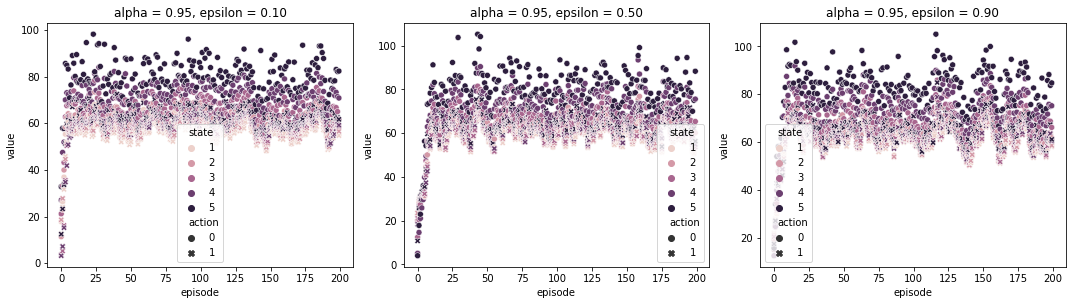

In [14]:
# Creating the figure for the 3 subplots
plt.figure(figsize=(15,8))
# Counter needed to plot different subsets
counter = 0

#Looping on the different values of epsilon
for epsilon in [0.1, 0.5, 0.9]:
    # initialize the Q table
    Q = np.zeros([5, 2])
    
    # Create the dataframe to plot on the scatterplot
    df_q = pd.DataFrame(columns=['episode', 'state', 'action', 'value', 'epsilon'])

    # Increase the counter for the subplot
    counter = counter + 1

    #Optimising Q*, looping through num_episodes
    for k in range(num_episodes):
        # Reset the environment
        state = env.reset()

        # Done helps us deciding when getting out of the loop
        done = False
        while done == False:
            # First we select an action:
            if random.uniform(0, 1) < epsilon: # Flip a skewed coin
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(Q[state,:]) # Exploit learned values
            # Then we perform the action and receive the feedback from the environment
            new_state, reward, done, info = env.step(action)
            # Finally we learn from the experience by updating the Q-value of the selected action
            update = reward + (gamma*np.max(Q[new_state,:])) - Q[state, action]
            Q[state,action] += learning_rate*update 
            state = new_state

        # Now we create the dataframe with the data to plot it
        for i in range(0,len(Q)):
            for j in range(0,2):
                df_temp = pd.DataFrame([[k, i+1, j, Q[i][j]]],columns=['episode', 'state', 'action', 'value'])
                df_q = df_q.append(df_temp)

    # We  are now going to do a scatterplot
    plt.subplot(2,3, counter)
    sns.scatterplot(
        data=df_q,
        x='episode',
        y='value',
        hue='state',
        style='action'
    )
    plt.title(
        "alpha = %0.2f, epsilon = %0.2f" % (gamma, epsilon)
    )
# Increasing the distance between plots to increase readibility
plt.tight_layout(h_pad=2)
plt.show()

**3b)** Does the result seem reasonable? Why?

The results seem reasonable.
The further the state, the higher the expected value is: it is relevant with the forward action of state 5 having a high reward compared to all the other backward and forward actions.

As can be seen, epsilon has a negligible effect on the overall results. In the end, the highest Q-value always ends up to be the state 5 with action 0 (a) once the plateau has been reached. 

The plateau for higher epsilon is reached quite faster as expected.

It is interesting to note how high values of epsilon (0.9) show a periodic shape, indicating how the exploration can lead to lower results since we are not exploiting.

Finally, we can check that the Q-learning algorithm works as it should. We expect that the highest Q-value is in the 8th place (since we have a 5x2 matrix and we expect that state 5, action 0 (a) to be the best one). And in general, action a should be always the best one in all the states.

In [15]:
# Let's take a look at the results.
print('The grid is:')
print(Q)

print('\nThe highest Q-value is in position: %i \n' % np.argmax(Q))
# Should be 8
for i in range(0,len(Q)):
    print('The best action in state %i is: %s' %(i, chr(np.argmax(Q[i,:])+97)))
# Should be all 'a'

The grid is:
[[58.94221439 58.18997957]
 [61.88049563 58.70851737]
 [66.23735037 60.4596304 ]
 [75.26533936 60.57342011]
 [84.79137745 61.24081512]]

The highest Q-value is in position: 8 

The best action in state 0 is: a
The best action in state 1 is: a
The best action in state 2 is: a
The best action in state 3 is: a
The best action in state 4 is: a


In the end, varying epsilon only modifies *a* value and *b* value, but in the end action *a* still prevails. This is because we know that we do not need to explore too much the environment as we only have 5 states and we know the last one (5) is the best one, so we might as well just exploit it.

In fact, the results seem reasonable since the highest reward can be achieved by doing action *a* in state 5. So, the RL explored and learned that the optimal path is to reach this action on state 5.

The results seem reasonable since the highest reward can be achieved by doing action *a* in state 5. So, the RL explored and learned that the optimal path is to reach this action on state 5.

## Question 4

**4a)** Define the MDP corresponding to the Chain environment above and verify that the optimal $Q^*$ value obtained using simple Q-learning is the same as the optimal value function $V^*$ for the corresponding MDP's optimal action. Hint: compare values obtained using value iteration and Q-learning.



The same strategy as before is applied here: initialisation, defining the same functions and then iterating to find the values and the policy.

In [16]:
#Initialisation

gamma_Q=0.95
VO_Q= np.zeros([5,1])
xmax=5

#Initiate the policy
policy_Q=[[0],[0],[0],[0],[0]]

#Accuracy
eps_Q=1e-6

#This dictionary will help us find the optimal action later in the code
find_action_Q={0:'a', 1:'b'}

grid_Q=copy.deepcopy(VO_Q)

#This Boolean will help us having the proper precision in our while loop
change_Q=True


In [17]:
#Movement

def go_forward(x):
    if x==4: 
        return(x) #This is to handle when the state 5 is looping
    else:
        return(x+1)

def go_backward(x):
    if x==0:
        return(x) #This is to handle when the state 1 is looping
    else:
        return(x-1)

In [18]:
# As before, we define the value function. But this time, we have different rewards so according
# to if we are going forward or backward we have different results.
def value_Q(previous_grid,x_state,x_action):
    if x_action>x_state:
        reward=0
    elif (x_action==xmax-1):
        reward=10
    else:
        reward=2
        
    value = (reward + gamma_Q*previous_grid[x_action])
    return value

In [19]:
while change_Q:
    previous_grid=copy.deepcopy(grid_Q) #To avoid links between our list, we use copy library
    #looping on each state
    for x in range(xmax): 
        #Getting the value for each type of actions
        value_forward = value_Q( 
                            previous_grid,
                            x,
                            go_forward(x))
        value_backward = value_Q(
                            previous_grid,
                            x,
                            go_backward(x))
        
        values_actions=[value_forward, value_backward]
        
        #Finding the best action
        index=values_actions.index(max(values_actions))
        
        #Updating the value of the state
        grid_Q[x]=values_actions[index]
        
        #Updating the policy
        policy_Q[x]=find_action_Q[index]
    
    #Loop to check if the state is accurate enough
    change_Q=False
    for x in range(xmax):
        if abs(previous_grid[x]-grid_Q[x])>eps_Q:
            change_Q=True
            break

print('The values are :')
print(grid_Q)
print('The optimal policy is')
print(policy_Q)

The values are :
[[162.90123173]
 [171.47498173]
 [180.49998173]
 [189.99998173]
 [199.99998173]]
The optimal policy is
['a', 'a', 'a', 'a', 'a']


The results are correct and reflect what has been seen with the Q-learning algorithm. The best policy is always a, and the highest value is the last state.

## Part 7: Importance of exploration and exploitation


This part deals about the dilemma between exploration vs exploitation in RL.

The purpose of Reinforcement Learning is to maximize the rewards of each state by creating the optimal policy. However, Reinforcement Learning or *learning under uncertainty*, as mentioned in its name, is full of uncertainty since the environment is not entirely known. This means that some actions might be more rewardful but might not be explored. There is then a tradeoff between exploring too much and exploiting too much.

Thus, some algorithms deal with this by implementing the notion of *Regret* by keeping track of the rewards of less optimal actions, such as *Greedy* and *Epsilon Greedy* algorithmn, by allocating a certain amount of actions to exloration.  

For instance, Reinforcement Learning is starting to be used in the energy industry, by some grid operators. In fact, several actions can be taken to handle the different grids issues such as the power peaks that changes the frequency of the grid or reallocation of power if some components fail, by for instance switching off boilers, switching on some hydropower plants, etc. The environment is complex since it is made of millions of components and the agents have billions of actions it can take to solve the issues. Thus, some actions are well-known and often exploited to solve thess issues, but some actions can give more rewards by for instance putting less stress on some structures and then enhancing their duration life. Defining here the value of the rewards of this unknown environment depend on the expertise of the grid operator and the data scientits.


# References
Primer/text based on the following references:
* http://www.cse.chalmers.se/~chrdimi/downloads/book.pdf
* https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf